In [1]:
import pandas as pd

In [5]:
red_wine_df = pd.read_csv("./winequality-red.csv",sep=";")
white_wine_df = pd.read_csv(".//winequality-white.csv",sep=";")

In [9]:
final_df = pd.concat(objs=[red_wine_df,white_wine_df],ignore_index=True)

In [10]:
final_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# data is a pandas dataframe containing the wine attributes
X = scaler.fit_transform(final_df)

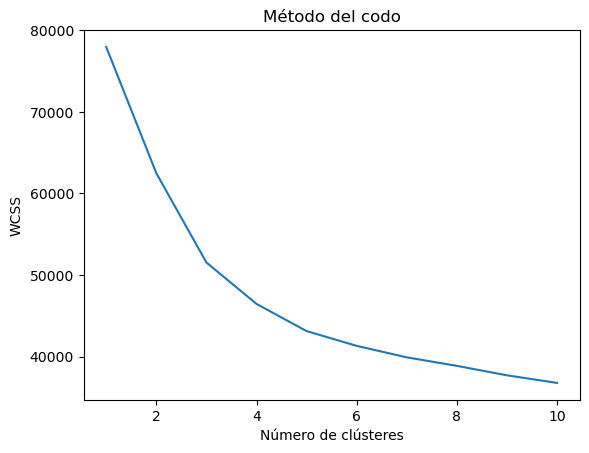

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans_prueba = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_prueba.fit(X)
    wcss.append(kmeans_prueba.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

In [18]:
1# choose any value for k
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) # fit the model to the data
# get the cluster labels for each data point
km_labels = kmeans.labels_
# get the cluster centroids
km_centroids = kmeans.cluster_centers_

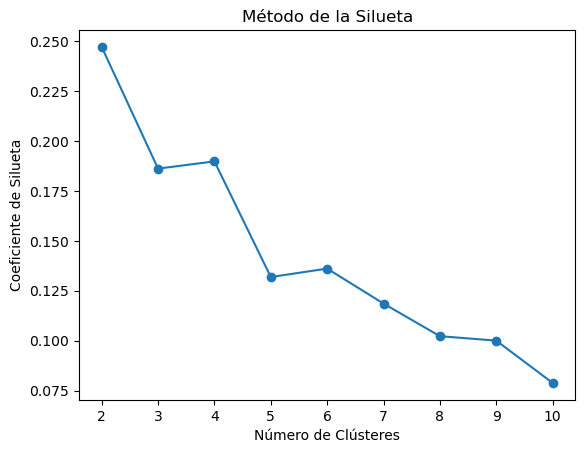

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Creamos una lista para almacenar los valores de la silueta
silhouette_scores = []

# Probamos diferentes valores de k (número de clusters)
for k in range(2, 11):
    # Creamos el modelo de clustering
    model = AgglomerativeClustering(n_clusters=k)
    # Ajustamos el modelo a los datos
    labels = model.fit_predict(X)
    # Calculamos el coeficiente de la silueta
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Graficamos la curva de la silueta en función del número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta')
plt.show()


In [22]:
# choose any value for n_clusters
agg = AgglomerativeClustering(n_clusters=5)
# fit the model to the data
agg.fit(X)
# get the cluster labels for each data point
agc_labels = agg.labels_

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Realizar búsqueda manual de hiperparámetros
for eps in [0.1, 0.2, 0.5]:
    for min_samples in [5, 10, 20]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        if len(set(labels)) > 1:  # Ignorar casos con un solo clúster
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'eps': 0.1, 'min_samples': 5}


In [27]:
from sklearn.cluster import DBSCAN
# choose any values for eps and min_samples
dbscan = DBSCAN(eps=0.1, min_samples=5)
# fit the model to the data
dbscan.fit(X)
# get the cluster labels for each
# data point (-1 means outlier)
dbs_labels = dbscan.labels_

In [31]:
from sklearn.cluster import HDBSCAN

best_score = -1
best_params = {'min_cluster_size': None, 'min_samples': None}

# Realizar búsqueda manual de hiperparámetros
for min_cluster_size in [5, 10, 20]:
    for min_samples in [5, 10, 20]:
        clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        clusterer.fit(X)
        labels = clusterer.labels_
        if len(set(labels)) > 1:  # Ignorar casos con un solo clúster
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params['min_cluster_size'] = min_cluster_size
                best_params['min_samples'] = min_samples

print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'min_cluster_size': 5, 'min_samples': 10}


In [32]:
from sklearn.cluster import HDBSCAN
# choose any values for eps and min_samples
hdbscan = HDBSCAN(min_cluster_size=5,min_samples=10)
# fit the model to the data
hdbscan.fit(X)
# get the cluster labels for each
# data point (-1 means outlier)
hdbs_labels = hdbscan.labels_

KMneans Silhouette score: 0.2310184353989469


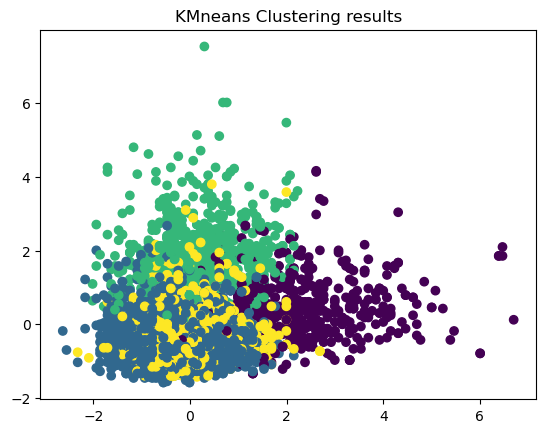

AgglomerativeClustering Silhouette score: 0.13188839597732113


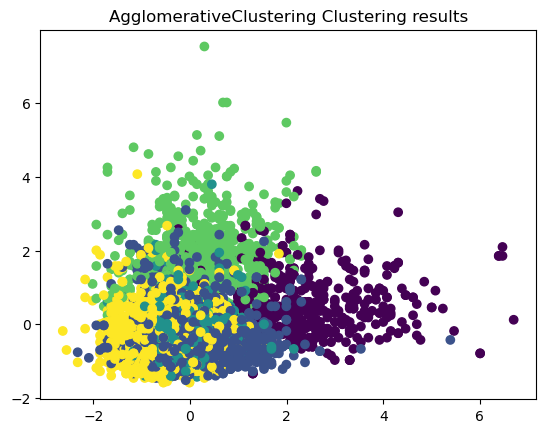

DBSCAN Silhouette score: -0.19767736475641973


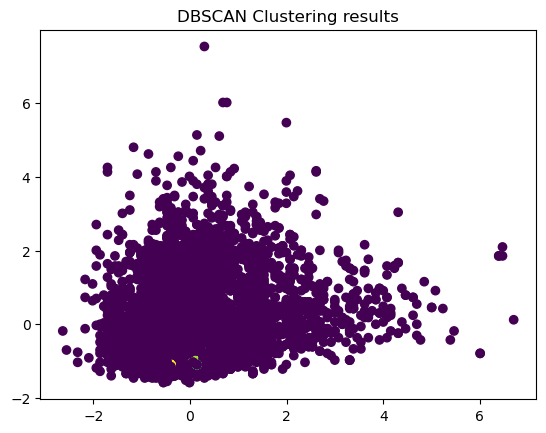

HDBSCAN Silhouette score: 0.5219188839236709


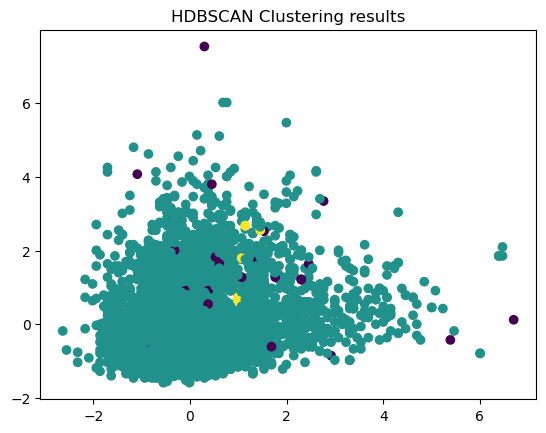

In [33]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

names = ["KMneans","AgglomerativeClustering","DBSCAN","HDBSCAN"]
labels = [km_labels,agc_labels,dbs_labels,hdbs_labels]

for name,label in zip(names,labels):
    
    score = silhouette_score(X, label)
    print(f"{name} Silhouette score:", score)
    
    plt.figure()
    # plot the first two features with cluster colors
    plt.scatter(X[:,0], X[:,1], c=label)
    plt.title(f"{name} Clustering results")
    plt.show()
